# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

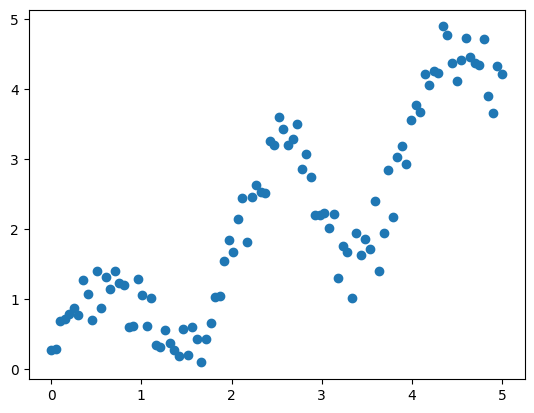

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5658898590088738


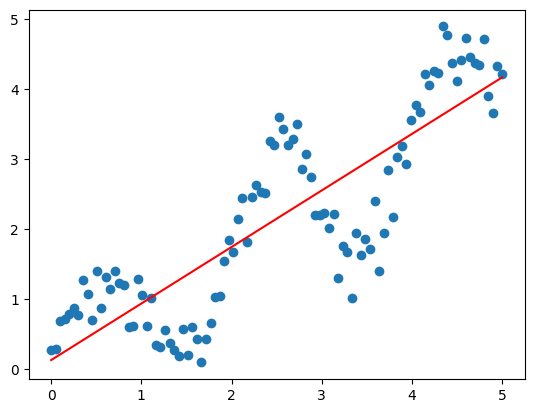

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

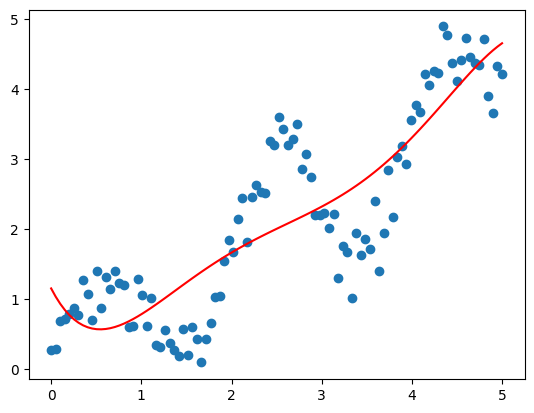

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-2.50128468  3.352241   -1.49535709  0.29670977 -0.02122312]
interception:  1.1525523685017052


In [14]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([1.15255237, 1.0345849 , 0.93258994, 0.84548007, 0.77221256,
       0.7117885 , 0.66325196, 0.62568915, 0.5982276 , 0.58003531,
       0.57031992, 0.56832787, 0.57334357, 0.58468853, 0.60172058,
       0.62383298, 0.65045363, 0.68104419, 0.71509927, 0.75214558,
       0.7917411 , 0.83347424, 0.876963  , 0.92185417, 0.96782241,
       1.01456949, 1.06182344, 1.10933768, 1.15689021, 1.20428275,
       1.25133996, 1.29790852, 1.34385635, 1.38907178, 1.43346266,
       1.47695557, 1.51949496, 1.56104235, 1.60157542, 1.64108724,
       1.67958543, 1.71709127, 1.75363891, 1.78927453, 1.82405547,
       1.85804944, 1.89133365, 1.92399398, 1.95612414, 1.98782486,
       2.01920301, 2.05037079, 2.0814449 , 2.11254567, 2.14379627,
       2.17532182, 2.20724859, 2.23970318, 2.27281161, 2.30669858,
       2.34148653, 2.3772949 , 2.41423922, 2.45243033, 2.49197349,
       2.53296758, 2.57550425, 2.61966708, 2.66553076, 2.71316024,
       2.76260987, 2.81392262, 2.86712919, 2.9222472 , 2.97928

In [15]:
regr_poly.predict(X_poly)

array([1.15255237, 1.0345849 , 0.93258994, 0.84548007, 0.77221256,
       0.7117885 , 0.66325196, 0.62568915, 0.5982276 , 0.58003531,
       0.57031992, 0.56832787, 0.57334357, 0.58468853, 0.60172058,
       0.62383298, 0.65045363, 0.68104419, 0.71509927, 0.75214558,
       0.7917411 , 0.83347424, 0.876963  , 0.92185417, 0.96782241,
       1.01456949, 1.06182344, 1.10933768, 1.15689021, 1.20428275,
       1.25133996, 1.29790852, 1.34385635, 1.38907178, 1.43346266,
       1.47695557, 1.51949496, 1.56104235, 1.60157542, 1.64108724,
       1.67958543, 1.71709127, 1.75363891, 1.78927453, 1.82405547,
       1.85804944, 1.89133365, 1.92399398, 1.95612414, 1.98782486,
       2.01920301, 2.05037079, 2.0814449 , 2.11254567, 2.14379627,
       2.17532182, 2.20724859, 2.23970318, 2.27281161, 2.30669858,
       2.34148653, 2.3772949 , 2.41423922, 2.45243033, 2.49197349,
       2.53296758, 2.57550425, 2.61966708, 2.66553076, 2.71316024,
       2.76260987, 2.81392262, 2.86712919, 2.9222472 , 2.97928

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [16]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [17]:
sigma = 0.3

In [18]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [19]:
regr_rbf = LinearRegression()

In [20]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

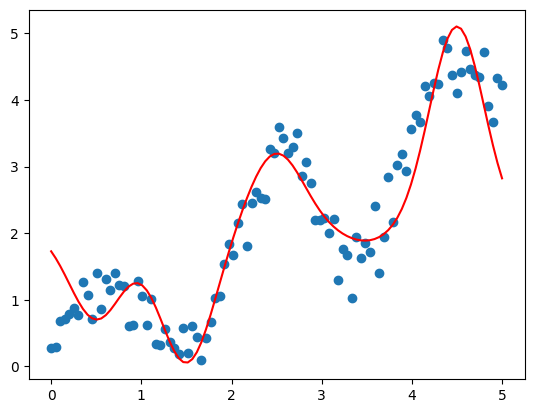

In [21]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [22]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-1.35428898 -2.00924552  1.13862748 -0.19250943  3.03751341]
interception:  2.0652114809474367


#### Comparison

In [23]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

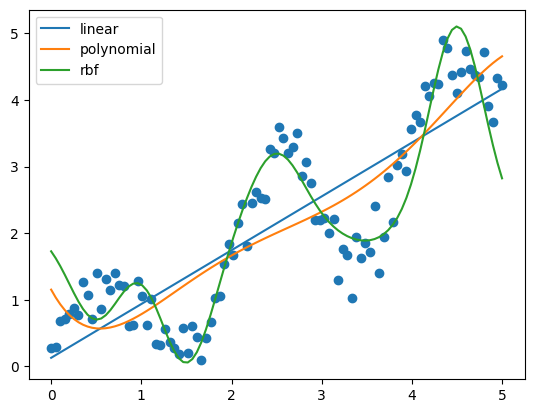

In [24]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [25]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5658898590088738


In [26]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.49800627062298447


In [27]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.2405188522676489
